In [12]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import pymysql

from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image

In [80]:
def pie_graph(ratio, labels, name):
    colors = ['silver', 'gold', 'whitesmoke', 'lightgray']
    plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
    plt.title(name, size = 20)
    plt.show()

In [48]:
df = pd.read_csv("temp_work_net_bigdata.csv")
AI_df = df.drop('Unnamed: 0', axis=1)
AI_df

,모집직종,직무내용,경력조건,학력,전공,자격면허,우대조건
0,데이터 분석가(빅데이터 분석가) 직업정보,"데이터수집, 정제 데이터 분석 인공지능 개발 논문연구",경력 (최소 1년 이상) 우대,학력무관,정보·통신공학(학과 : 데이터정보학과) 통계학(학과 : 데이터경영학과),우대 : 데이터분석준전문가 우대 : 빅데이터분석기사,-
1,데이터 분석가(빅데이터 분석가) 직업정보,"자료조사(문헌, 설문 등) 데이터분석(엑셀, R프로그램, 파이썬 등) 보고서 작성(...",관계없음,대졸(4년) ~ 박사,-,-,-
2,IT개발·데이터,-,무관,학력무관,-,-,-
3,IT개발·데이터,-,경력 (최소 2년 이상),대졸(4년),-,-,-
4,데이터 분석가(빅데이터 분석가) 직업정보,브래키츠(주)에서 아래와 같이 태블로(Tableau) 경력자를 모집합니다. [ 회사...,경력 (최소 2년 이상) 필수,학력무관,-,-,-
...,...,...,...,...,...,...,...
195,-,"빅데이터/AI, DBA/데이터베이스",무관,학력무관,-,-,-
196,-,"빅데이터/AI, 응용프로그램개발, DBA/데이터베이스",무관,석사,-,-,-
197,-,"빅데이터/AI, 응용프로그램개발, DBA/데이터베이스",무관,석사,-,-,-
198,-,"빅데이터/AI, 응용프로그램개발, DBA/데이터베이스",무관,대졸(4년),-,-,-


In [62]:
df = pd.read_csv("iframe_data.csv")
AI_df2 = df.drop('Unnamed: 0', axis=1)
AI_df2

,우대,요건,업무
0,모집부문상세내용공통 자격요건ㆍ 학력 : 무관ㆍ 경력 : 신입/경력데이터인텔리전스팀데...,모집부문상세내용공통 자격요건ㆍ 학력 : 무관ㆍ 경력 : 신입/경력데이터인텔리전스팀데...,모집부문상세내용공통 자격요건ㆍ 학력 : 무관ㆍ 경력 : 신입/경력데이터인텔리전스팀데...
1,-,-,-
2,-,-,-
3,-,-,-
4,-,-,-
5,공통 자격요건ㆍ학력 : 학사이상 (졸업예정자 가능)ㆍ경력 : 관련 경력 2~3년 필...,공통 자격요건ㆍ학력 : 학사이상 (졸업예정자 가능)ㆍ경력 : 관련 경력 2~3년 필...,공통 자격요건ㆍ학력 : 학사이상 (졸업예정자 가능)ㆍ경력 : 관련 경력 2~3년 필...
6,-,-,-
7,-,-,-
8,-,-,-
9,-,-,-


In [49]:
AI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   모집직종    200 non-null    object
 1   직무내용    200 non-null    object
 2   경력조건    200 non-null    object
 3   학력      200 non-null    object
 4   전공      200 non-null    object
 5   자격면허    200 non-null    object
 6   우대조건    200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB


In [50]:
AI_df = AI_df.astype({'경력조건':'category', '학력':'category'})

In [72]:
AI_df.head()

,모집직종,직무내용,경력조건,학력,전공,자격면허,우대조건
0,데이터 분석가(빅데이터 분석가) 직업정보,"데이터수집, 정제 데이터 분석 인공지능 개발 논문연구",경력 (최소 1년 이상) 우대,학력무관,정보·통신공학(학과 : 데이터정보학과) 통계학(학과 : 데이터경영학과),우대 : 데이터분석준전문가 우대 : 빅데이터분석기사,-
1,데이터 분석가(빅데이터 분석가) 직업정보,"자료조사(문헌, 설문 등) 데이터분석(엑셀, R프로그램, 파이썬 등) 보고서 작성(...",관계없음,대졸(4년) ~ 박사,-,-,-
2,IT개발·데이터,-,무관,학력무관,-,-,-
3,IT개발·데이터,-,경력 (최소 2년 이상),대졸(4년),-,-,-
4,데이터 분석가(빅데이터 분석가) 직업정보,브래키츠(주)에서 아래와 같이 태블로(Tableau) 경력자를 모집합니다. [ 회사...,경력 (최소 2년 이상) 필수,학력무관,-,-,-


## 규티빠띠 cloud 그리기

In [66]:
title_list = list(AI_df["직무내용"]) + list(AI_df2["우대"])
title_list

['데이터수집, 정제 데이터 분석 인공지능 개발 논문연구',
 '자료조사(문헌, 설문 등) 데이터분석(엑셀, R프로그램, 파이썬 등) 보고서 작성(아래한글, PPT 등) 지원 ※ 고용센터 채용대행건으로 구직신청 후 워크넷으로 입사지원 바랍니다. - 실업급여 구직활동을 위한 지원을 자제 부탁드리며, 실제 취업의사가 있는 분만 지원 바랍니다.',
 '-',
 '-',
 '브래키츠(주)에서 아래와 같이 태블로(Tableau) 경력자를 모집합니다. [ 회사 소개 ] ‘디지털 해결소’를 표방하는 브래키츠(주)는 다양한 분야 유수의 고객사에 DT(Digital Transformation), Analytics, Cloud 등 ERP·BI 분야 전반에 걸쳐 실용적인 솔루션을 제공하는 IT 컨설팅 기업입니다. 2021년 창사 이래 급속한 성장과 함께 우리는 열정 있는 인재들을 찾아 함께 성장하고자 합니다. [ 직무 및 업무 내용 ] ▶   태블로(Tableau)를 이용한 데이터 시각화 및 분석 작업 수행 ▶   다양한 데이터 소스로부터의 데이터 추출 및 가공 ▶   리포트 및 대시보드 개발 및 유지보수 ▶   데이터 분석 결과에 대한 해석 및 비즈니스(고객사)에 제안 [ 자격 요건 ] ▶   태블로(Tableau) 경력 2년 이상 ✔  세일즈포스 태블로 신병훈련소 교육자료 생성/이해 가능 실력 ✔   태블로 장표 생성에 필요한 데이터셋(포맷) 구성 능력 필요 ▶   SQL 조회문(select) 작성 실력 ✔   서브쿼리, 피벗 사용 가능자 [ 우대 사항 ] ▶   태블로 구축 프로젝트 진행 경험 3회 이상 [ 지원 방법 ] ▶   접수: 워크넷 ▶   제출 서류: 이력서, 자기소개서, 포트폴리오(있을 경우) BI(Business Intelligence)는 비즈니스 의사결정 시 근거를 제공하고 의사결정 이후에도 기업활동을 모니터링하기 위한 필수 시스템으로서, 한 회사의 경영 노하우를 시스템에 녹여낸 회사 경영의 필수 요소입니다. 태블로(Tableau)는 이러한 BI 시장에서 최

[('데이터', 'Noun'), ('수집', 'Noun'), (',', 'Punctuation'), ('정제', 'Noun'), ('데이터', 'Noun'), ('분석', 'Noun'), ('인공', 'Noun'), ('지능', 'Noun'), ('개발', 'Noun'), ('논문', 'Noun'), ('연구', 'Noun')]
--------------------------------------------------------------------------------
[('자료', 'Noun'), ('조사', 'Noun'), ('(', 'Punctuation'), ('문헌', 'Noun'), (',', 'Punctuation'), ('설문', 'Noun'), ('등', 'Noun'), (')', 'Punctuation'), ('데이터', 'Noun'), ('분석', 'Noun'), ('(', 'Punctuation'), ('엑셀', 'Noun'), (',', 'Punctuation'), ('R', 'Alpha'), ('프로그램', 'Noun'), (',', 'Punctuation'), ('파이썬', 'Noun'), ('등', 'Noun'), (')', 'Punctuation'), ('보고서', 'Noun'), ('작성', 'Noun'), ('(', 'Punctuation'), ('아래한글', 'Noun'), (',', 'Punctuation'), ('PPT', 'Alpha'), ('등', 'Noun'), (')', 'Punctuation'), ('지원', 'Noun'), ('※', 'Foreign'), ('고용', 'Noun'), ('센터', 'Noun'), ('채용', 'Noun'), ('대행', 'Noun'), ('건', 'Noun'), ('으로', 'Josa'), ('구직', 'Noun'), ('신청', 'Noun'), ('후', 'Noun'), ('워크넷', 'Noun'), ('으로', 'Josa'), ('입사', 'Noun'), ('지원', 'No

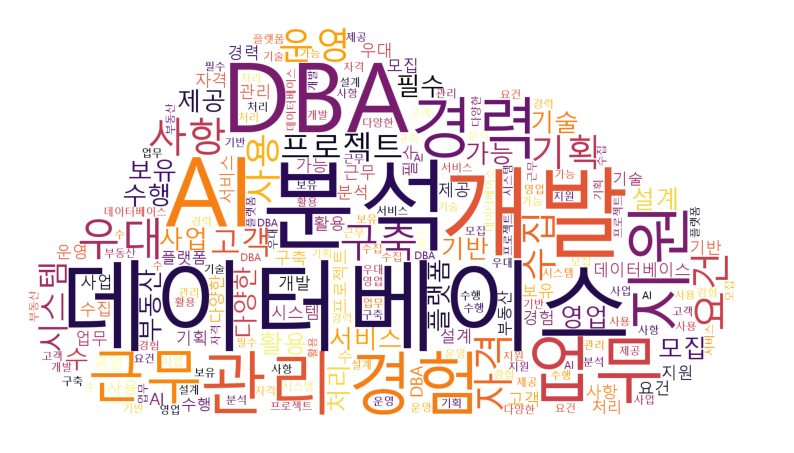

In [88]:
def make_wordcloud(title_list, stopwords, word_count):  # 딕셔너리로 만듦
    okt = Okt()
    sentences_tag = []
    # 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-' * 80)
    noun_adj_list = []
    # 명사와 형용사만 구분하여 리스트에 추가
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective', "Alpha"]:
                noun_adj_list.append(word)
    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print('-' * 80)
    print(tags)
    tag_dict = dict(tags)
    # 검색어 제외 방법 2: dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin':  # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    img_mask = np.array(Image.open('cloud.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
                          background_color="white", max_font_size=200,
                          repeat=True,
                          colormap='inferno', mask=img_mask)
    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()


if __name__ == '__main__':
    #search_word = "ChatGPT"  # 검색어 지정
    #title_list = []
    stopwords = ['데이터', "빅데이터", "및", "이상", "등", "관련", "분", "위", "있으신"]  # wordcloud에서 제외할 단어
    # 1~200번게시글 까지 크롤링
    #get_titles(1, 200, search_word, title_list)
    # 단어 50개까지 wordcloud로 출력
    make_wordcloud(title_list, stopwords, 50)

[('데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), ('(', 'Punctuation'), ('빅데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), (')', 'Punctuation'), ('직업', 'Noun'), ('정보', 'Noun')]
--------------------------------------------------------------------------------
[('데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), ('(', 'Punctuation'), ('빅데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), (')', 'Punctuation'), ('직업', 'Noun'), ('정보', 'Noun')]
--------------------------------------------------------------------------------
[('IT', 'Alpha'), ('개발', 'Noun'), ('·', 'Punctuation'), ('데이터', 'Noun')]
--------------------------------------------------------------------------------
[('IT', 'Alpha'), ('개발', 'Noun'), ('·', 'Punctuation'), ('데이터', 'Noun')]
--------------------------------------------------------------------------------
[('데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), ('(', 'Punctuation'), ('빅데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), (')', 'Punctuation'), ('직업', 'Noun'), ('정보', 'Noun')]
--------

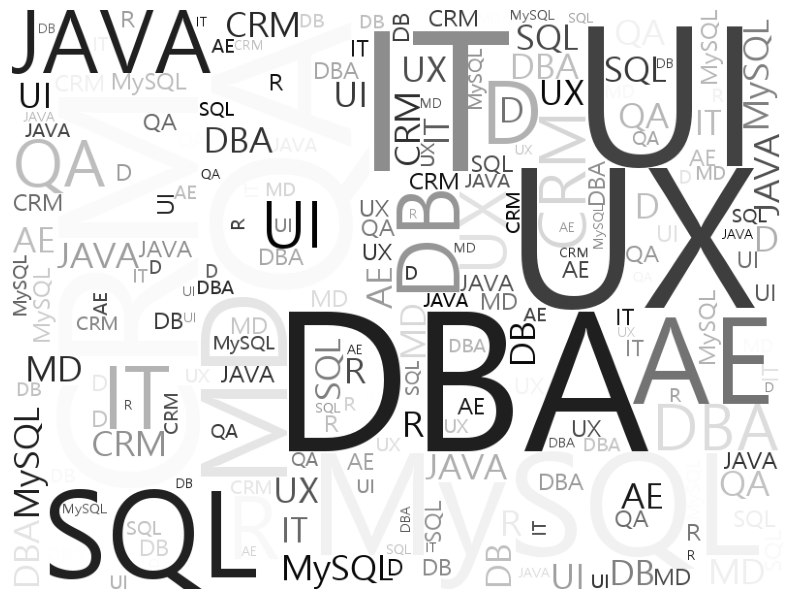

In [101]:
def make_wordcloud(title_list, stopwords, word_count):  # 딕셔너리로 만듦
    okt = Okt()
    sentences_tag = []
    # 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-' * 80)
    noun_adj_list = []
    # 명사와 형용사만 구분하여 리스트에 추가
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ["Alpha"]: #####################
                noun_adj_list.append(word)
    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print('-' * 80)
    print(tags)
    tag_dict = dict(tags)
    # 검색어 제외 방법 2: dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin':  # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    img_mask = np.array(Image.open('cloud.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
                          background_color="white", max_font_size=200,
                          repeat=True,
                          colormap='gist_gray')
    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()


if __name__ == '__main__':
    #search_word = "ChatGPT"  # 검색어 지정
    #title_list = []
    stopwords = ['데이터', "빅데이터", "및", "이상", "등", "관련", "분", "위", "있으신", "or", "B"]  # wordcloud에서 제외할 단어
    # 1~200번게시글 까지 크롤링
    #get_titles(1, 200, search_word, title_list)
    # 단어 50개까지 wordcloud로 출력
    make_wordcloud(title_list, stopwords, 50)

In [91]:
title_list = list(AI_df["모집직종"])
title_list

['데이터 분석가(빅데이터 분석가) 직업정보',
 '데이터 분석가(빅데이터 분석가) 직업정보',
 'IT개발·데이터',
 'IT개발·데이터',
 '데이터 분석가(빅데이터 분석가) 직업정보',
 '데이터 분석가(빅데이터 분석가) 직업정보',
 '데이터 분석가(빅데이터 분석가) 직업정보',
 '데이터엔지니어,데이터사이언티스트',
 '웹기획,콘텐츠마케터,백엔드개발자,프론트엔드개발자,웹개발자,앱개발자,시스템엔지니어,DBA,데이터엔지니어,데이터사이언티스트,머신러닝엔지니어,웹퍼블리셔,그래픽디자이너,편집디자이너,물류관리자,자재관리자,유통관리자,영업관리,영업지원,학교·특수학교교사,학원강사,학습지·방문교사,교재개발·교수설계,출판·편집,작가',
 '기타 연극·영화·방송 종사원',
 '데이터 전문가',
 'DBA,MySQL',
 '설문·리서치,데이터엔지니어,데이터사이언티스트',
 '자동차,전기·전자,일반사무',
 '데이터엔지니어',
 '기획·전략,IT개발·데이터',
 'IT개발·데이터',
 '데이터 분석가(빅데이터 분석가) 직업정보',
 '-',
 '데이터 전문가',
 '-',
 '데이터 분석가(빅데이터 분석가) 직업정보',
 'SQL',
 '데이터 분석가(빅데이터 분석가) 직업정보',
 '서버구축,데이터베이스',
 '-',
 '데이터엔지니어,데이터사이언티스트,DBA',
 '데이터 분석가(빅데이터 분석가) 직업정보',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '데이터사이언티스트,데이터엔지니어',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'DBA,데이터엔지니어,데이터사이언티스트',
 '-',
 '-',
 '-',
 '-',
 'IT개발·데이터',
 '-',
 '데이터사이언티스트,IT·기술영업,데이터엔지니어',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '데이터사이언티스트,웹기획,경영·비즈니스 기획',
 '데이터웨어하우징',


[('데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), ('(', 'Punctuation'), ('빅데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), (')', 'Punctuation'), ('직업', 'Noun'), ('정보', 'Noun')]
--------------------------------------------------------------------------------
[('데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), ('(', 'Punctuation'), ('빅데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), (')', 'Punctuation'), ('직업', 'Noun'), ('정보', 'Noun')]
--------------------------------------------------------------------------------
[('IT', 'Alpha'), ('개발', 'Noun'), ('·', 'Punctuation'), ('데이터', 'Noun')]
--------------------------------------------------------------------------------
[('IT', 'Alpha'), ('개발', 'Noun'), ('·', 'Punctuation'), ('데이터', 'Noun')]
--------------------------------------------------------------------------------
[('데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), ('(', 'Punctuation'), ('빅데이터', 'Noun'), ('분석', 'Noun'), ('가', 'Josa'), (')', 'Punctuation'), ('직업', 'Noun'), ('정보', 'Noun')]
--------

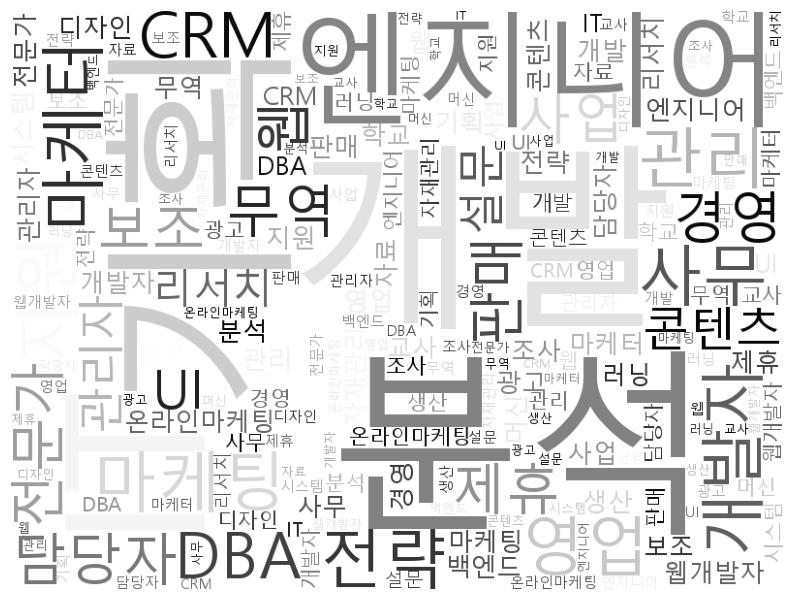

In [100]:
def make_wordcloud(title_list, stopwords, word_count):  # 딕셔너리로 만듦
    okt = Okt()
    sentences_tag = []
    # 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-' * 80)
    noun_adj_list = []
    # 명사와 형용사만 구분하여 리스트에 추가
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective', "Alpha"]:
                noun_adj_list.append(word)
    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print('-' * 80)
    print(tags)
    tag_dict = dict(tags)
    # 검색어 제외 방법 2: dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin':  # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    # img_mask = np.array(Image.open('cloud.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
                          background_color="white", max_font_size=200,
                          repeat=True,
                          colormap='gist_gray')
    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()


if __name__ == '__main__':
    #search_word = "ChatGPT"  # 검색어 지정
    #title_list = []
    stopwords = ['데이터', "빅데이터", "및", "이상", "등", "관련", "분", "위", "있으신", "티스", "트", "직업", "정보"]  # wordcloud에서 제외할 단어
    # 1~200번게시글 까지 크롤링
    #get_titles(1, 200, search_word, title_list)
    # 단어 50개까지 wordcloud로 출력
    make_wordcloud(title_list, stopwords, 50)

## 경력조건 비율 알아보기

In [56]:
AI_df["경력조건"].value_counts()

무관                       92
경력 (최소 12개월 이상)          15
신입, 경력 (연수무관)            10
관계없음                     10
경력 (최소 3년 이상)             9
경력 (최소 5년 이상)             8
경력 (최소 1년 이상)             7
신입                        7
경력 (최소 7년 이상)             6
경력 (최소 2년 이상)             6
경력 (최소 1년 이상) 우대          4
경력 (최소 8년 이상)             4
경력 (최소 10년 이상)            3
신입, 경력 (최소 1년 이상)         2
-                         2
경력 (최소 4년 이상)             2
신입/경력                     2
경력 (최소 5년 이상) 필수          1
경력 (최소 6년 이상)             1
경력                        1
경력 (최소 8년 이상) 필수          1
경력 (최소 3년 이상) 우대          1
경력 (최소 2년 이상) 필수          1
경력 (최소 2년 이상) 우대          1
경력 (최소 1년 이상) 필수          1
경력 (연수무관)                 1
신입, 경력 (최소 2년 이상)         1
신입, 경력 (최소 8년 3개월 이상)     1
Name: 경력조건, dtype: int64

In [57]:
sum(list(AI_df["경력조건"].value_counts()))

200

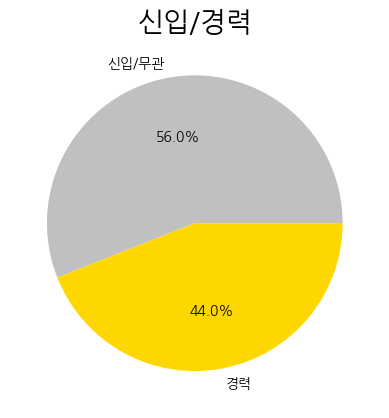

In [82]:
ratio = [(92+20), 200-112]
labels = ['신입/무관', '경력']
title = "신입/경력"
pie_graph(ratio, labels, title)

## 학력 비율알아보기

In [60]:
AI_df["학력"].value_counts()

학력무관                 104
대졸(4년)                51
석사                    17
대졸(2~3년)              11
고졸                     4
-                      3
대졸(4년) ~ 박사            3
석사 ~ 박사                3
대졸(2~3년) ~ 대졸(4년)      1
대졸(2~3년) ~ 박사          1
대졸(4년) ~ 석사            1
박사                     1
Name: 학력, dtype: int64

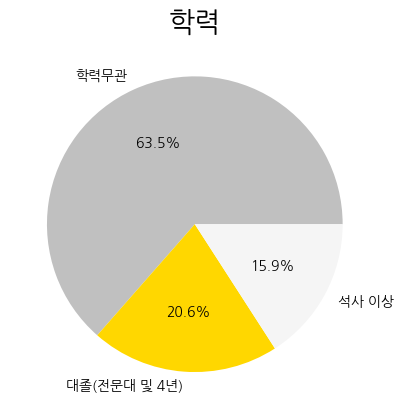

In [83]:
ratio = [104+4, (21+11+3), (17+10)]
labels = ['학력무관', '대졸(전문대 및 4년)', "석사 이상"]
title = "학력"
pie_graph(ratio, labels, title)

# 전공

In [75]:
AI_df["전공"].value_counts()

-                                                   191
정보·통신공학(학과 : 데이터정보학과) 통계학(학과 : 데이터경영학과)               1
연극·영화(학과 : 영화(편집)) 전산학·컴퓨터공학(학과 : 영화영상ㆍ멀티미디어공학부)      1
전산학·컴퓨터공학(학과 : 컴퓨터공학과군)                               1
전산학·컴퓨터공학(학과 : 전산학전공) 전자공학(학과 : 전기전자및컴퓨터공학부)          1
전산학·컴퓨터공학(학과 : 정보전산학과)                                1
전산학·컴퓨터공학(학과 : IT정보공학부(컴퓨터시스템공학,소프트웨어공학))             1
전산학·컴퓨터공학(학과 : 컴퓨터과학과) 응용 소프트웨어 공학(학과 : 소프트웨어학과)      1
통계학(학과 : 통계정보학과) 전산학·컴퓨터공학(학과 : 정보·경영대학 컴퓨터학과)        1
전산학·컴퓨터공학(학과 : 컴퓨터공학과) 전산학·컴퓨터공학(학과 : 인공지능전공)         1
Name: 전공, dtype: int64

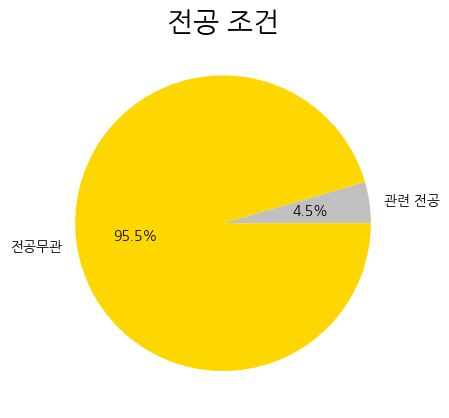

In [89]:
ratio = [9, 191]
labels = ['관련 전공', '전공무관']
title = "전공 조건"
pie_graph(ratio, labels, title)

In [87]:
data_dict = {"모집직종":[],
             "직무내용":[],
             "경력조건":[],
             "학력":[],
             "전공":[],
             "자격면허":[],
             "우대조건":[]}

-                                                                             194
장애인 우대                                                                          2
- 기타 (적극적인 자세와 긍정적인 마인드의 소유자)                                                   1
- AWS(DynamoDB, EC2, RDS), GCP(BigQuery), Google Analytics 사용 경험이 있으신 분         1
운전면허증, 차량소지자                                                                    1
- 기타 (성실하고 책임감 있는 분을 환영합니다.\n 반복 작업 위주의 업무이므로 해당 업무를 잘 이해할 수 있는 분을 희망합니다.)      1
Name: 우대조건, dtype: int64

<hr><hr><hr><hr><hr><hr><hr>